# Called Third Strike
## Part 2. Data Exploration 

This project's goal is to build probability models for as to whether a pitch will be called a strike or not. The intended models are to be:
1. A neural network (NN) based approach.
2. A non-NN based approach.

---
__**This Notebook's**__ objective is to explore the data to gain further familiarity with it, and to identify candiate features for our 

---

### Import Data

We have saved local versions of the data, so we will ingest them from there.

We'll use `pandas` to read into dataframes and explore. 

In [146]:
### Data handling
import pandas as pd

# We should visualize some of the data, so let's get seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df_train = pd.read_csv('../data/train_ingested.csv')
df_test = pd.read_csv('../data/test_ingested.csv')

Let's work with the training data.

In [148]:
df_train.head().T

,0,1,2,3,4
pitch_id,01311c57-5046-48d7-ac68-000060a98ccb,208d0186-b7c9-46bd-8297-0001539b714c,4a24d09e-2d9b-4d12-a0eb-0004723ce539,486aa6b8-7c43-4974-8a53-000611a9c649,2aff251b-099b-447b-9862-00100124b7c1
season,2021,2021,2021,2021,2021
game_date,2021-05-13,2021-07-29,2021-05-15,2021-06-05,2021-06-13
inning,7,9,1,1,3
side,home,home,home,home,home
run_diff,-2,4,0,2,-2
at_bat_index,54,69,1,5,24
pitch_of_ab,5,2,3,3,5
batter,405947,468294,406141,615134,626949
pitcher,756778,778005,451846,564585,784463


On broad visual inspection, seems to make sense. We'll definitely get a opportunity for more questions as we go through each feature/target, which is the plan.

In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354039 entries, 0 to 354038
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   pitch_id              354039 non-null  object 
 1   season                354039 non-null  int64  
 2   game_date             354039 non-null  object 
 3   inning                354039 non-null  int64  
 4   side                  354039 non-null  object 
 5   run_diff              354039 non-null  int64  
 6   at_bat_index          354039 non-null  int64  
 7   pitch_of_ab           354039 non-null  int64  
 8   batter                354039 non-null  int64  
 9   pitcher               354039 non-null  int64  
 10  catcher               354039 non-null  int64  
 11  umpire                354039 non-null  int64  
 12  bside                 354039 non-null  object 
 13  pside                 354039 non-null  object 
 14  stringer_zone_bottom  354039 non-null  float64
 15  

### Feature Exploration

Since we have a somewhat manageable # of features, let's go through them and make sure we at least identify what they are and their utility to our goal.

##### Summarize Columns

In [150]:
print(list(df_train.columns))

['pitch_id', 'season', 'game_date', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool']


---

`pitch_id`

Self-explanatory, distinct ID given to each pitch.

In [151]:
# of rows in dataset
display(f'There are {df_train.shape[0]} rows in training data set.')

'There are 354039 rows in training data set.'

In [152]:
# of distinct pitch IDs
display(f"There are {df_train['pitch_id'].unique().shape[0]} rows in training data set.")

'There are 354035 rows in training data set.'

Interesting, so there are 4 pitches that are in the dataset 'twice'. At least that's my theory. Since that is such a small amount relative to the dataset, let's go ahead and identify and remove those dupes.

In [153]:
vc_pitch_id = df_train['pitch_id'].value_counts()

In [154]:
drop_pitch_id = vc_pitch_id[vc_pitch_id > 1].index.values.tolist()

In [155]:
drop_pitch_id

['39b8ee0e-f2aa-4422-8fd8-d2d0f885a108',
 '11aa870a-fc24-482f-b3e6-4aaeac474cfe',
 '0edd497b-23fd-4c7d-91b8-f6040416d3ad',
 '6eb345fe-931d-4707-a5a1-9ba8181085e8']

Smells right, only 4 as expected.

In [156]:
keep_pitch_id = vc_pitch_id[vc_pitch_id == 1].index.values.tolist()

In [157]:
len(keep_pitch_id)

354031

Makes sense, as 4x2 rows will have the dupes:

In [158]:
(len(keep_pitch_id) + 2*len(drop_pitch_id)) == df_train.shape[0]

True

Let's save only the non-dupes. Moving forward, we will name our intended working dataset incorporating any edits or cleaning.

In [159]:
#Keep only the non-dupes
df_train_use = df_train[df_train['pitch_id'].isin(keep_pitch_id)]

In [160]:
df_train_use.shape

(354031, 31)

__Test Data__

For now, we'll leave test set as is. But let's at least make a placeholder.

In [174]:
df_test_use = df_test.copy()

---
`season`

Self-explanatory, let's take a quick look to make sure things look reasonable.

In [161]:
df_train_use['season'].value_counts()

2021    354031
Name: season, dtype: int64

All from the same season. Let's check `df_test`.

In [162]:
df_test['season'].value_counts()

2021    18633
Name: season, dtype: int64

Same. Since it's not adding any information let's remove it for simplicity.

In [163]:
df_train_use.drop(['season'], axis=1, inplace=True)

In [164]:
df_train_use.shape

(354031, 30)

__Test Data__

Also perform on test set.

In [165]:
display(f'# columns before drop: {df_test.shape[1]}')
df_test_use = df_test.drop(['season'], axis=1)
display(f'# columns after drop: {df_test_use.shape[1]}')

(18633, 30)

(18633, 29)

---
`game_date`

Seems self-explanatory, let's take a quick look to make sure things look reasonable.

In [166]:
df_train_use['game_date'].dtype

dtype('O')

Object, but maybe we will want it as a `date` to take advantage of date functionalities.

In [167]:
df_train_use['game_date'].head()

0    2021-05-13
1    2021-07-29
2    2021-05-15
3    2021-06-05
4    2021-06-13
Name: game_date, dtype: object

In [168]:
df_train_use['game_date_dt'] = pd.to_datetime(df_train_use['game_date'])

In [169]:
df_train_use['game_date_dt'].dtype

dtype('<M8[ns]')

In [170]:
df_train_use['game_date_dt'].head()

0   2021-05-13
1   2021-07-29
2   2021-05-15
3   2021-06-05
4   2021-06-13
Name: game_date_dt, dtype: datetime64[ns]

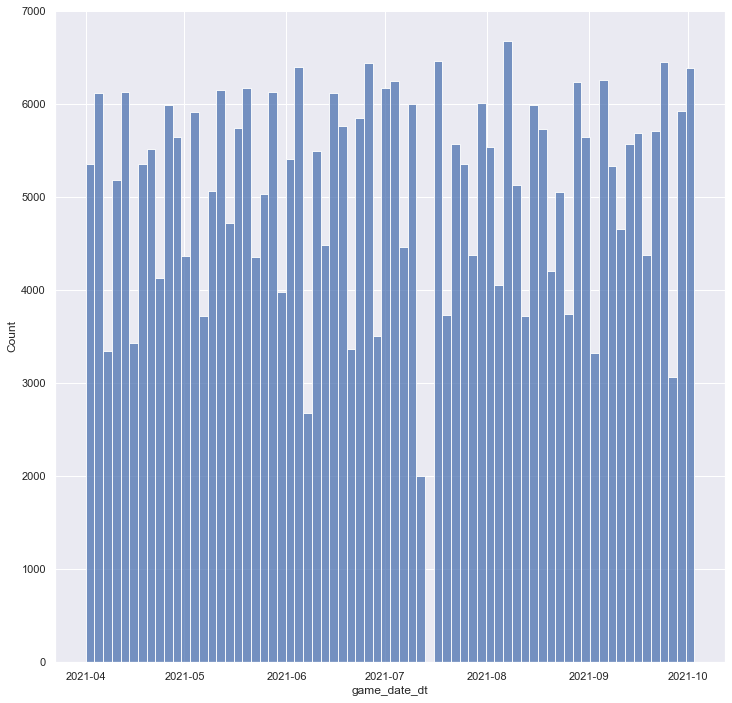

In [171]:
sns.histplot(x='game_date_dt', data=df_train_use)
sns.set(rc={'figure.figsize':(12,12)})
plt.show()

This smells right. Looks like it's a full season of data, roughly equally pulled across the season.

There's a gap in July, but that should be the All-Star break.

We don't need the old `game_date` so let's `drop`.

In [172]:
display(f'# columns before drop: {df_train_use.shape[1]}')
df_train_use.drop(['game_date'], axis=1, inplace=True)
display(f'# columns after drop: {df_train_use.shape[1]}')

'# columns before drop: 31'

'# columns after drop: 30'

__Test Data__

Let's look at the spread of dates.

In [175]:
# Create datetime version of column
df_test_use['game_date_dt'] = pd.to_datetime(df_test_use['game_date'])

Inspect histogram:

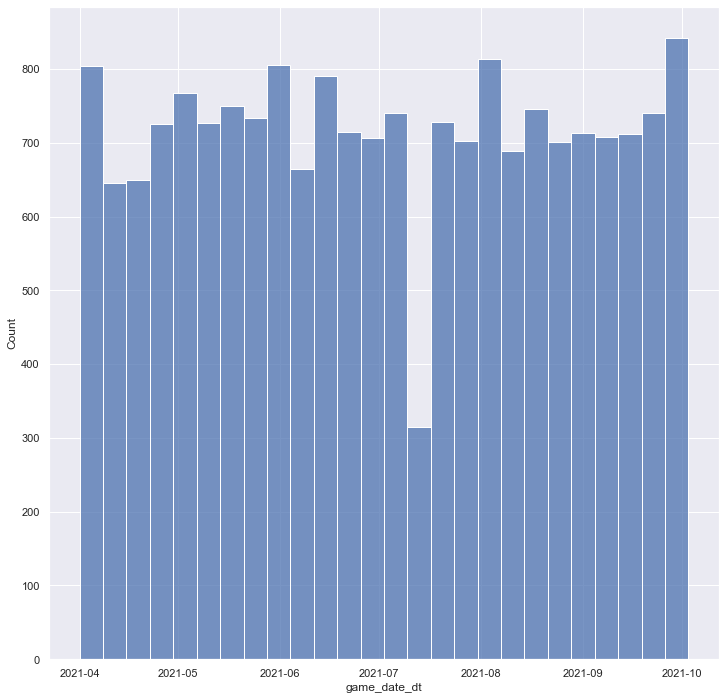

In [176]:
sns.histplot(x='game_date_dt', data=df_test_use)
sns.set(rc={'figure.figsize':(12,12)})
plt.show()

On visual inspection, looks like the test data is random sample from the same distribution of the train data. 

I'm ok with this.

In [178]:
display(f'# columns before drop: {df_test_use.shape[1]}')
df_test_use.drop(['game_date'], axis=1, inplace=True)
display(f'# columns after drop: {df_test_use.shape[1]}')

'# columns before drop: 30'

'# columns after drop: 29'

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`inning`

Seems self-explanatory, let's take a quick look to make sure things look reasonable.

In [182]:
df_train_use['inning'].dtype

dtype('int64')

In [183]:
df_train_use['inning'].value_counts()

1     41940
2     40335
6     40249
7     40161
3     40132
5     39616
8     39416
4     39340
9     28683
10     2949
11      902
12      215
13       49
15       18
16       17
14        9
Name: inning, dtype: int64

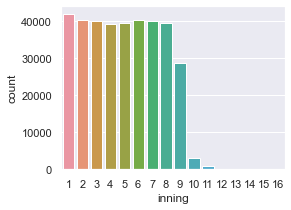

In [200]:
sns.countplot(x='inning', data=df_train_use)
sns.set(rc={'figure.figsize':(8,6)})
plt.show()

Seems to make sense:
- innings > 9 are extra inning games
- 9th innning having lower volume of pitches relative to `inning`s <=8 likely due to home team leading after top of the 9th.

I'm ok with this.

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`side`


In [189]:
df_train_use.head()

,pitch_id,inning,side,run_diff,at_bat_index,pitch_of_ab,batter,pitcher,catcher,umpire,...,pitch_speed,px,pz,break_x,break_z,angle_x,angle_z,pitch_type,strike_bool,game_date_dt
0,01311c57-5046-48d7-ac68-000060a98ccb,7,home,-2,54,5,405947,756778,528871,482420,...,97.4298,-1.298100,2.302170,1.915350,-9.54142,3.02727,5.59379,FA,0,2021-05-13
1,208d0186-b7c9-46bd-8297-0001539b714c,9,home,4,69,2,468294,778005,594400,583103,...,91.7712,1.412220,1.574430,-12.137300,-21.94270,-1.56782,6.86676,FA,0,2021-07-29
2,4a24d09e-2d9b-4d12-a0eb-0004723ce539,1,home,0,1,3,406141,451846,633795,423579,...,87.8130,-0.181190,2.112480,-0.992261,-25.51070,2.04966,7.17281,SL,1,2021-05-15
3,486aa6b8-7c43-4974-8a53-000611a9c649,1,home,2,5,3,615134,564585,633812,482532,...,86.5546,-0.885538,0.598692,-2.839300,-27.25090,2.96845,8.50392,SL,0,2021-06-05
4,2aff251b-099b-447b-9862-00100124b7c1,3,home,-2,24,5,626949,784463,614419,596164,...,95.0891,0.900718,2.018200,-6.419950,-14.31720,-2.64734,5.63426,XX,1,2021-06-13


In [190]:
df_train_use['side'].value_counts()

home    179188
away    174843
Name: side, dtype: int64

---
`run_diff`

This seems to be run differential at the time of the pitch. Let's look to make sure the values agree with our understanding of that.


In [216]:
sns.set(rc={'figure.figsize':(8,4)})

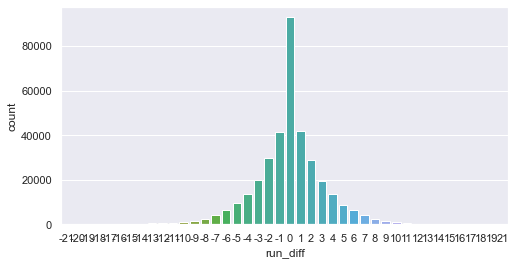

In [218]:
sns.countplot(x='run_diff', data=df_train_use)
plt.show()

Makes sense, leave as is.

---
`at_bat_index`

This appears to be enumerated at-bats, starting at index `0`.


In [223]:
df_train_use['at_bat_index'].value_counts(sort=False)

0      4680
1      4836
2      4843
3      4860
4      4822
       ... 
120       2
121       3
122       1
123       2
124       4
Name: at_bat_index, Length: 121, dtype: int64

In [227]:
sns.set(rc={'figure.figsize':(18,6)})

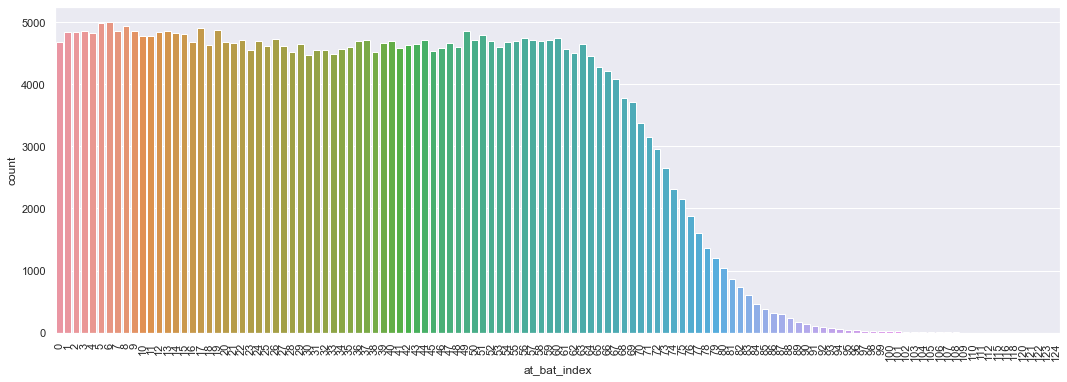

In [229]:
ax = sns.countplot(x='at_bat_index', data=df_train_use)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Ok, this smells ok, it should indicate the number of at bats for both teams over the course of the game.

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`pitch_of_ab`

Sounds like enumerated pitch during an at-bat.

In [227]:
sns.set(rc={'figure.figsize':(18,6)})

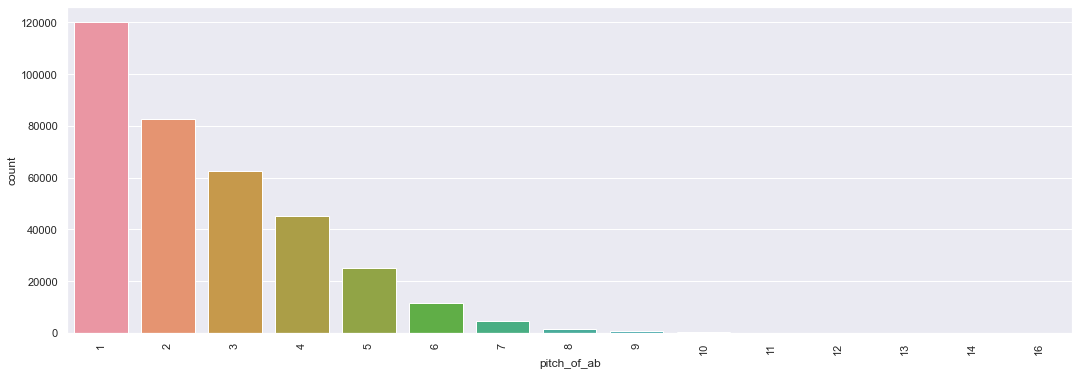

In [230]:
ax = sns.countplot(x='pitch_of_ab', data=df_train_use)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Makes sense.

---
`batter`, `pitcher`, `catcher`, `umpire`

These look like IDs for the individual persons in these roles.

In [233]:
roles = ['batter', 'pitcher', 'catcher', 'umpire']

In [250]:
# Get value counts for each role
for i in range(len(roles)):
    display(df_train_use.loc[:,roles[i]].value_counts())
    print('\n')

627264    1651
782551    1608
627785    1542
784584    1537
785447    1501
          ... 
777115       1
776776       1
773396       1
565835       1
406163       1
Name: batter, Length: 1032, dtype: int64

529217    1684
501531    1636
565784    1554
565989    1540
565870    1532
          ... 
785946       1
529451       1
530174       1
577470       1
579250       1
Name: pitcher, Length: 909, dtype: int64

627932    9091
404869    8882
469396    8649
501708    8630
594400    8048
          ... 
529360      15
563292      14
780355      11
777271      10
777642      10
Name: catcher, Length: 116, dtype: int64

574224    5055
634203    5015
404602    4891
574236    4778
482473    4634
          ... 
482682     776
527980     324
583102     323
565191     144
564951     128
Name: umpire, Length: 99, dtype: int64

So it appears that there are about 1k different `batter`s, 900 different `pitcher`s, >100 different `catcher`s, and ~100 `umpires`

The relative size makes sense. While it's arguable that the presence of a certain individual can affect the strike call (umpires have different strike zones, some pitchers are more wild, some catchers excel at framing, etc.) I'm not entirely sure how feasible it will be to use any of all of these as categories since it would greatly increasing the dimensionality of the dataset. But we'll keep for now.

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`bside`, `pside`

Sounds like the Side/Handedness of the batter and pitcher.

In [251]:
sides = ['bside', 'pside']

In [253]:
# Get value counts for each role
for i in range(len(sides)):
    display(df_train_use.loc[:,sides[i]].value_counts())
    print('\n')

R    207666
L    146365
Name: bside, dtype: int64

R    249281
L    104750
Name: pside, dtype: int64

I think this is a reasonable assumption. Leave as is.

---
`stringer_zone_bottom`, `stringer_zone_top`

I really didn't have a pre-existing idea what this could be, but on some research I think it's the following:

From [Baseball Prospectus]():  
_For postgame analysis, there is no standard definition of the strike zone. That’s partly because most postgame analysis is done without the knowledge of each particular batter’s stance. In the absence of the batter’s stance information, analysts use a generic, “typical” batter strike zone, but each analyst has their own idea of the dimensions and location. Or they might use data of the top and bottom, which is set by MLB stringers. But **stringers are people setting a top and bottom based on their subjective assessment, or they use pre-defined values obtained at some random time that may or may not be relevant to the player at the time of batting.**_

So while it sounds like there is some subjectivity to the setting of these values, it is likely a piece of information that will have some signal.

Let's take a look.

In [254]:
zone_edges = ['stringer_zone_bottom', 'stringer_zone_top']

1.53    53025
1.56    50127
1.59    47673
1.60    34038
1.51    33166
        ...  
1.05        1
2.27        1
0.79        1
2.09        1
1.00        1
Name: stringer_zone_bottom, Length: 119, dtype: int64

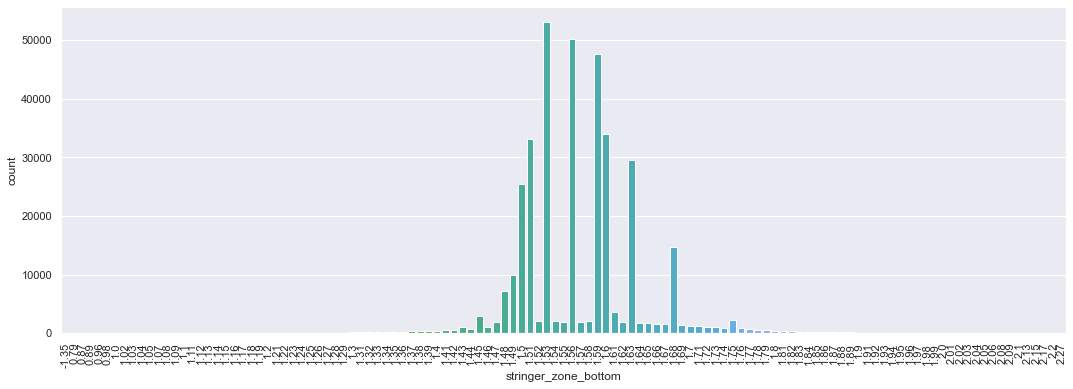

3.37    52274
3.41    49011
3.47    46044
3.32    32287
3.49    32069
        ...  
2.31        1
4.17        1
4.20        1
2.59        1
4.52        1
Name: stringer_zone_top, Length: 179, dtype: int64

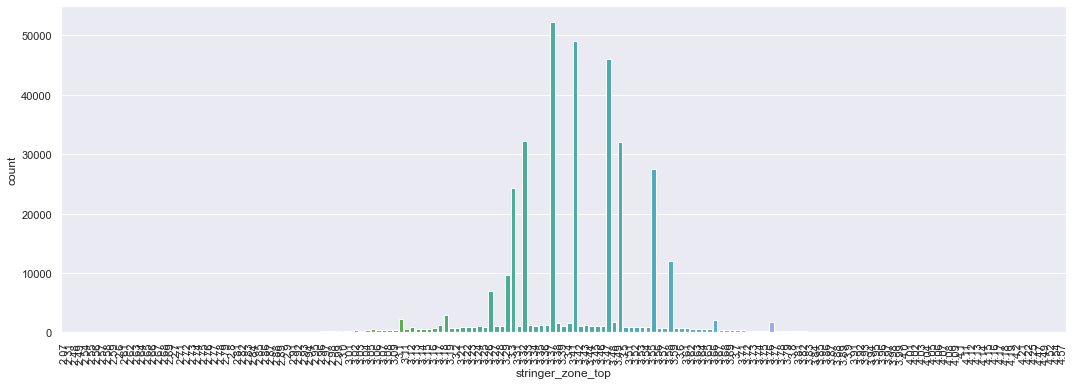

In [261]:
# Get value counts for each role
for i in range(len(zone_edges)):
    display(df_train_use.loc[:,zone_edges[i]].value_counts())
    ax = sns.countplot(x=zone_edges[i], data=df_train_use)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    print('\n')

Without really digging into it more, it seems like while there is an aura of precision to the measurements, there are only a handful of values that get recorded by stringers almost all the time. It might have to do with work conventions, or the tools used to measure or record.

Leave as is.

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`on_1b_mlbid`, `on_2b_mlbid`, `on_3b_mlbid`

Seems self-explanatory, ID's of players on base at the time of the pitch.

In [262]:
runners = ['on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid']

In [263]:
# Get value counts for each role
for i in range(len(runners)):
    display(df_train_use.loc[:,runners[i]].value_counts())
    # ax = sns.countplot(x=runners[i], data=df_train_use)
    # ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    print('\n')

782551.0    626
406351.0    588
784827.0    565
528790.0    510
781533.0    509
           ... 
785113.0      1
422713.0      1
576686.0      1
561160.0      1
529333.0      1
Name: on_1b_mlbid, Length: 822, dtype: int64

777964.0    330
627304.0    320
578271.0    315
406351.0    313
777694.0    311
           ... 
623679.0      1
526645.0      1
561169.0      1
528649.0      1
538101.0      1
Name: on_2b_mlbid, Length: 764, dtype: int64

541952.0    170
577817.0    169
784584.0    166
565637.0    164
537271.0    162
           ... 
468877.0      1
561169.0      1
525040.0      1
405805.0      1
614999.0      1
Name: on_3b_mlbid, Length: 699, dtype: int64

Based on that there are hundreds of each that seems likely. 

Let's keep as is for now. as with the player info, it would be categories with high cardinality, so I'm not sure if the increase in model complexity of integrating them will be worth it. But we will keep in mind as an option.

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`outs`, `balls`, `stikes`

Seems self-explanatory, let's make sure the distribution makes sense.

In [265]:
states = ['outs', 'balls', 'strikes']

0    123460
1    115584
2    114987
Name: outs, dtype: int64

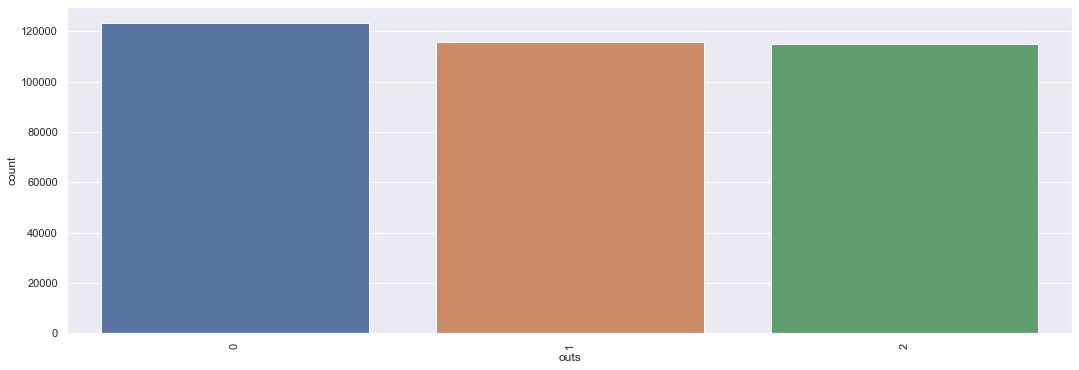

0    185786
1     97550
2     47811
3     22884
Name: balls, dtype: int64

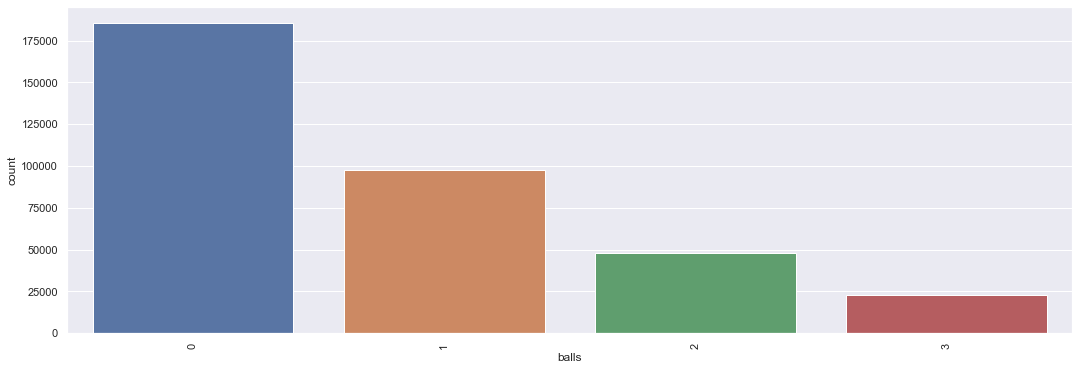

0    178491
1     96646
2     78894
Name: strikes, dtype: int64

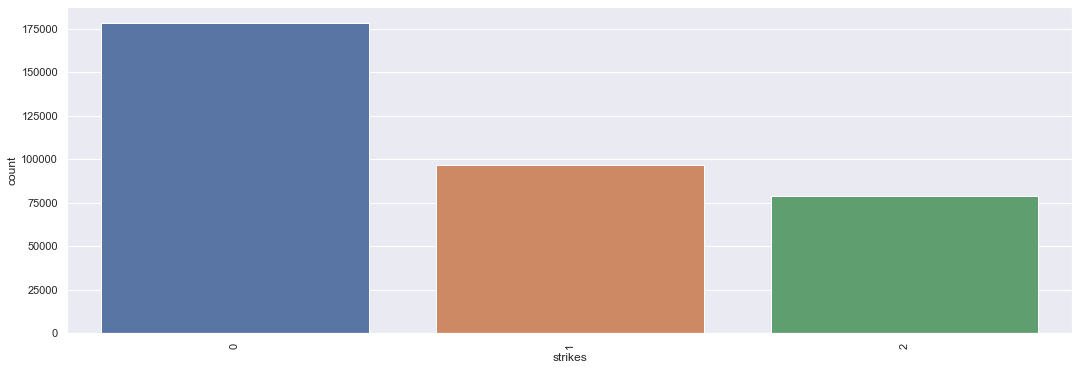

In [266]:
# Get value counts for each role
for i in range(len(states)):
    display(df_train_use.loc[:,states[i]].value_counts())
    ax = sns.countplot(x=states[i], data=df_train_use)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    print('\n')

Makes sense. No out 3, ball 4, or strike 3 since these are states that exist at beginning of pitch; the ones mentioned are outcomes after pitches.

---
`pitch_speed`

Ok, now I think we're getting to some of the more fun features.

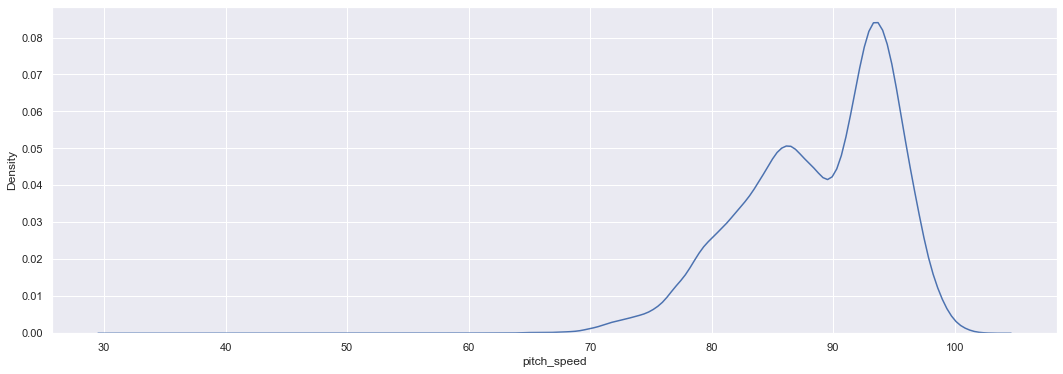

In [269]:
ax = sns.kdeplot(x='pitch_speed', data=df_train_use)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [271]:
df_train_use.pitch_speed.isnull().any()

False

Seems to make sense with my impression on modern pitch speeds. I won't bother segmented by pitch type, but we should expect to see differences there between, say, breaking balls and fastballs.

----
Let's look at those columns again:

In [188]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


In [1]:
%%capture
!pip install MLB-StatsAPI # Python wrapper MLB data API

In [2]:
import statsapi # Python wrapper MLB data API

In [3]:
statsapi.get('meta',{'type': 'gameTypes'})

[{'id': 'S', 'description': 'Spring Training'},
 {'id': 'R', 'description': 'Regular Season'},
 {'id': 'F', 'description': 'Wild Card Game'},
 {'id': 'D', 'description': 'Division Series'},
 {'id': 'L', 'description': 'League Championship Series'},
 {'id': 'W', 'description': 'World Series'},
 {'id': 'C', 'description': 'Championship'},
 {'id': 'N', 'description': 'Nineteenth Century Series'},
 {'id': 'P', 'description': 'Playoffs'},
 {'id': 'A', 'description': 'All-Star Game'},
 {'id': 'I', 'description': 'Intrasquad'},
 {'id': 'E', 'description': 'Exhibition'}]

In [3]:
statsapi.get('meta',{'type': 'pitchTypes'})

[{'code': 'EP', 'description': 'Eephus Pitch'},
 {'code': 'PO', 'description': 'Pitchout'},
 {'code': 'AB', 'description': 'Automatic Ball'},
 {'code': 'AS', 'description': 'Automatic Strike'},
 {'code': 'CH', 'description': 'Changeup'},
 {'code': 'CU', 'description': 'Curveball'},
 {'code': 'FA', 'description': 'Fastball'},
 {'code': 'FT', 'description': 'Two-seam FB'},
 {'code': 'FF', 'description': 'Four-seam FB'},
 {'code': 'FC', 'description': 'Cutter'},
 {'code': 'FS', 'description': 'Splitter'},
 {'code': 'FO', 'description': 'Forkball'},
 {'code': 'GY', 'description': 'Gyroball'},
 {'code': 'IN', 'description': 'Intentional Ball'},
 {'code': 'KC', 'description': 'Knuckle Curve'},
 {'code': 'KN', 'description': 'Knuckleball'},
 {'code': 'NP', 'description': 'No Pitch'},
 {'code': 'SC', 'description': 'Screwball'},
 {'code': 'SI', 'description': 'Sinker'},
 {'code': 'SL', 'description': 'Slider'},
 {'code': 'UN', 'description': 'Unknown'},
 {'code': 'ST', 'description': 'Slutter'

In [7]:
statsapi.get('meta',{'type': 'metrics'})

[{'name': '', 'metricId': 0},
 {'group': 'pitching',
  'name': 'releaseSpinRate',
  'unit': 'RPM',
  'metricId': 1000},
 {'group': 'pitching',
  'name': 'releaseExtension',
  'unit': 'FT',
  'metricId': 1001},
 {'group': 'pitching',
  'name': 'releaseSpeed',
  'unit': 'MPH',
  'metricId': 1002},
 {'group': 'pitching',
  'name': 'effectiveSpeed',
  'unit': 'MPH',
  'metricId': 1028},
 {'group': 'hitting, pitching',
  'name': 'launchSpeed',
  'unit': 'MPH',
  'metricId': 1003},
 {'group': 'hitting, pitching',
  'name': 'launchAngle',
  'unit': 'DEG',
  'metricId': 1005},
 {'group': 'hitting, pitching',
  'name': 'generatedSpeed',
  'unit': 'MPH',
  'metricId': 1044},
 {'group': 'hitting', 'name': 'maxHeight', 'unit': 'FT', 'metricId': 1039},
 {'group': 'hitting', 'name': 'travelTime', 'unit': 'SEC', 'metricId': 1049},
 {'group': 'hitting', 'name': 'hangTime', 'unit': 'SEC', 'metricId': 1027},
 {'name': 'opportunityTimeGround', 'metricId': 1091},
 {'group': 'hitting', 'name': 'distance', 

In [ ]:
statsapi.get('meta',{'type': 'gameTypes'})